# Correlation

Correlation tests are used to check if two samples are related. They are often used for feature selection and multivariate analysis in data preprocessing and exploration.

## Pearson's Correlation Coefficient

The goal of this test is to answer the question: do two samples have a linear relationship?

To answer this question, we will take the following steps:

1. Calculate the Pearson correlation coefficient, $r_{xy}$
2. Calculate the corresponding t-values
3. Test whether the t-values are significant or not

In this lesson, we will be looking at a dataset of student scores on an exam.

In [1]:
# imports
# data load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
from pydataset import data

In [2]:
df = pd.read_csv('exam_scores.csv')

In [3]:
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   exam_score       40 non-null     float64
 1   hours_studied    40 non-null     float64
 2   study_strategy   20 non-null     object 
 3   handedness       40 non-null     object 
 4   coffee_consumed  40 non-null     int64  
 5   hours_slept      40 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 2.0+ KB


### Pre-Set Values

Before we perform the test, we will choose some values for our confidence interval and, based on that value, our alpha.

In [6]:
n = df.shape[0]
degf = n - 2
conf_inf = 0.95
alpha = 1 - conf_inf

When performing a correlation test, our null hypothesis is that there is no linear correlation between the two variables.

$H_0$: There is no linear correlation between the number of hours studied and the score on the exam.

### Calculate Pearson Correlation Coefficient

The correlation coefficient, $r_{xy}$ is a unitless continuous numerical measure between -1 and 1, where 1 = perfect correlation and -1 = perfect negative correlation. 

We will calculate the correlation between hours studied and exam score.

$$
r_{xy} = \frac{\frac{1}{n} \sum(x_i - \bar{x})(y_i - \bar{y})}{s_x s_y}
$$

In [4]:
# let's make a quick little function for standard deviation, and calculate the correlation coefficient:

In [7]:
x = df.hours_studied
y = df.exam_score

def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return sqrt(variance)

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev(x) * stdev(y))

In [8]:
r_xy

0.8351498542413306

<hr style="border-top: 10px groove green; margin-top: 1px; margin-bottom: 1px"></hr>

### And just as we noted, we can think of these two Series as an x and y variable on a cartesian plot, and visually estimate correlation:

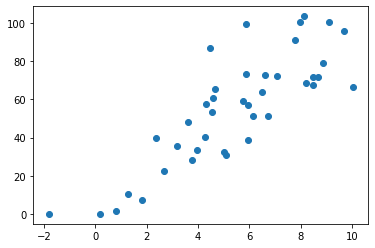

In [33]:
plt.scatter(df.hours_studied, df.exam_score)

<hr style="border-top: 10px groove cyan; margin-top: 1px; margin-bottom: 1px"></hr>

### Calculate the corresponding p-value

We can calculate a t-statistic for our correlation coefficient in order to inform us how likely it is that we observed this result due to chance. We will then use this t-statistic to find our p-value.

The t-value can be positive for positive correlations and negative for negative correlations, and is given by:

$$ t = \frac{r_{xy}\sqrt{n-2}}{\sqrt{1-r^{2}_{xy}}} $$

Where $n - 2$ is our degrees of freedom.

In [9]:
# calculate our t-statistic:
t = (r_xy * sqrt(n - 2) / sqrt(1 - r_xy **2))

In [10]:
t

9.359998377263368

Once we have our t-statistic, we can find our p-value by looking up the t-statistic in a t-table, or by using scipy's `t` distribution:

In [11]:
# calculate our p-value: 
p = stats.t.sf(t, df = degf) * 2

In [12]:
p

2.0762953315463266e-11

In [7]:
# compare our p-value to our alpha:


In [13]:
p < alpha

True

Lastly, we compare our p value to our alpha that we selected earlier:

<hr style="border-top: 10px groove cyan; margin-top: 1px; margin-bottom: 1px"></hr>

<hr style="border-top: 10px groove green; margin-top: 1px; margin-bottom: 1px"></hr>

<hr style="border-top: 10px groove cyan; margin-top: 1px; margin-bottom: 1px"></hr>

In [15]:
corr, p = stats.pearsonr(x, y)

In [16]:
corr

0.8351498542413308

In [17]:
p

2.0762953315462826e-11

## Correlation Gotchas

When working with correlation, keep in mind:

1. Correlation is not causality.
1. Correlation measures *linear* relationship between the 2 variables. However, there may be other types of relationships, such as a quadratic or absolute value relationship.
1. Correlations can be misleading when confounding variables are ignored.
1. Correlation tells you nothing about how large the relationship is.

### Correlation is Not Causation

Correlation means that two variables are associated, but doesn't tell us whether one causes the other or not.

### Non-Linear Relationship

Here we'll look at an example of a non-linear relationship:

In [8]:
# let's plot something that definitely does have a correlation, but is not linear

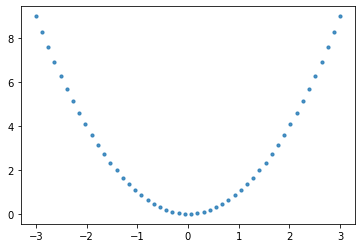

In [18]:
x = np.linspace(-3, 3)
y = x ** 2
plt.scatter(x,y, s=10, alpha=0.8)

In [19]:
r, p = stats.pearsonr(x, y)

In [20]:
r

-1.3183898417423734e-16

In [21]:
p

0.999999999999995

### Confounding Variables

We must be careful because correlation doesn't tell the whole story of a dataset. That is, correlation just looks at two variables in isolation, and doesn't account for any others. For example, a certain subgroup could have a strong correlation while another does not, or a third variable could be influencing both of the variables.

In our exam score data, if we look at coffee consumption and exam score, we see that they are strongly negatively correlated:

In [22]:
df.columns

Index(['exam_score', 'hours_studied', 'study_strategy', 'handedness',
       'coffee_consumed', 'hours_slept'],
      dtype='object')

Text(8, 80, 'r = -0.994')

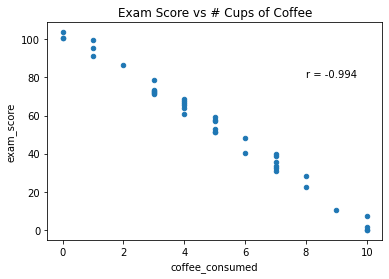

In [24]:
r, p = stats.pearsonr(df.coffee_consumed, df.exam_score)

df.plot.scatter('coffee_consumed', 'exam_score')
plt.title('Exam Score vs # Cups of Coffee')
plt.text(8,80, f'r = {r:.3f}')

However, it is probably the case that a third variable here has more influence, the number of hours that each student slept before the exam. We know that getting a good night's sleep improves exam scores, and if you don't get a good night's sleep, you are probably likely to drink more coffee.

In [27]:
r_sleep_coffee, p1 = stats.pearsonr(df.hours_slept, df.coffee_consumed)
r_sleep_score, p2 = stats.pearsonr(df.hours_slept, df.exam_score)

print('Correlation between hours slept and coffee consumed')
print(f'r = {r_sleep_coffee:.4f}, p = {p1}')
print('Correlation between hours slept and exam score')
print(f'r = {r_sleep_score:.4f}, p = {p2}')

Correlation between hours slept and coffee consumed
r = -1.0000, p = 4.915363906463736e-299
Correlation between hours slept and exam score
r = 0.9938, p = 7.739013921768295e-38


### Scale of the Relationship

The correlation coefficient shows us how linearly correlated two variables are, but doesn't tell us the scale. That is one variable could increase/decrease in lock step with another, but the size of the change could be tiny.

Imagine our data was a little different and we tracked several student's coffee intake before an exam. The coffee consumption could be perfectly correlated with exam score, but to such a small amount that it doesn't matter.

In [28]:
cups_of_coffee = [0, 1, 2, 3, 4]
exam_score = [80, 80.1, 80.2, 80.3, 80.4]
r, p = stats.pearsonr(cups_of_coffee, exam_score)

In [29]:
r

1.0

In [30]:
p

0.0

Text(1, 60, 'p = 0.000000e+00')

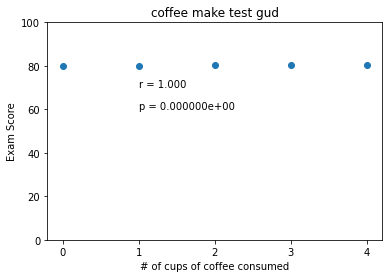

In [32]:
plt.scatter(cups_of_coffee, exam_score)
plt.title('coffee make test gud')
plt.ylim(0, 100)
plt.xticks(range(5))
plt.xlabel('# of cups of coffee consumed')
plt.ylabel('Exam Score')

plt.text(1,70, f'r = {r:.3f}')
plt.text(1, 60, f'p = {p:e}')

<hr style="border-top: 10px groove cyan; margin-top: 1px; margin-bottom: 1px"></hr>